Given a data point:


*   Calculate its distance from all other points
*   Get the closest K points
*   For Regression: Get the average of their values
*   For classification: Get the label with majority vote





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Split dataset into attributes and labels

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 4].values

In [ ]:
#Test and train data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=42)

Apply scaling to allow for uniform evaluation of features

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder_Y = LabelEncoder()
Y_train = labelencoder_Y.fit_transform(Y_train)

In [ ]:
Y_train

array([ 1,  3, 10,  1,  1, 15, 11,  1,  1,  0, 15, 12, 11,  3,  1,  6, 11,
       14, 10, 21,  9, 17, 11,  1, 16,  6,  1,  2,  3,  6, 14,  1,  1,  4,
        9,  1,  8, 18,  1,  9, 16,  1, 14, 15,  6, 11, 19,  9,  3,  6, 15,
        1,  1,  7, 13,  0, 20,  1,  5, 14,  7, 19, 12, 10, 19,  9,  1,  0,
       11, 14,  1,  2,  1, 11, 20,  2, 17, 21,  1, 10, 11, 14, 10, 19,  1,
       17, 11, 16,  6, 10, 10,  2,  9,  8,  1,  9, 14, 17,  3,  6, 21, 12,
        0, 20,  1, 11, 15, 14,  9, 14,  9,  9, 16, 14,  1,  9, 13,  1,  8,
       17])

Fit the KNN Algorithm

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski')
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Make predictions

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([ 9,  3, 14,  9,  9,  1,  9, 16,  9,  6, 17,  1,  1,  1,  3, 11, 14,
        6, 11, 14,  1, 14,  1, 14, 14, 16, 14, 17,  1,  1])

Evaluation Metrics

In [ ]:
Y_test = Y_test.astype(int)

print(Y_test.dtype)

int64


In [ ]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[0 8 0 2 0 0 0 0 0 0]
 [0 0 0 0 2 5 2 2 0 0]
 [0 0 0 0 0 0 0 5 2 2]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      10.0
           1       0.00      0.00      0.00      11.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       0.0

    accuracy                           0.00      30.0
   macro avg       0.00      0.00      0.00      30.0
weighted avg       0.00      0.00      0.00      30.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<Axes: >

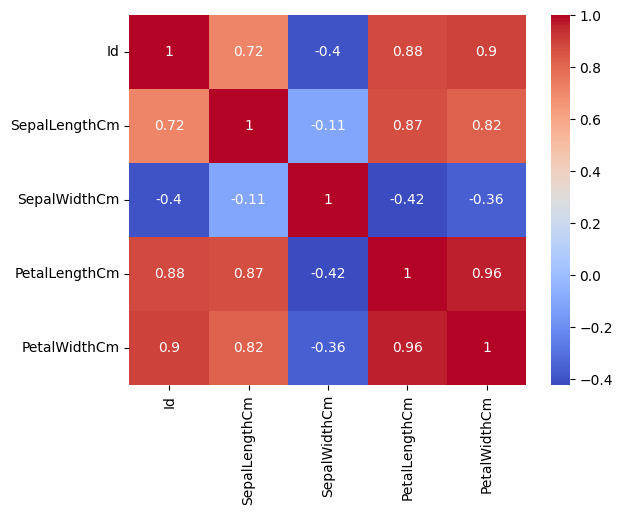

In [ ]:
t_new = df.drop('Species', axis=1)
sns.heatmap(t_new.corr(), annot=True, cmap='coolwarm')